# Homework 1 (100 points)

The goal of this homework is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops

look through the pandas documentation for alternatives.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [1]:
import pandas as pd

df = pd.read_csv('./train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [2]:
def num_nans(df):
    return len(df[df.isna().any(axis= 1)])

print("There are " +  str(num_nans(df)) + " rows with at least one empty value")

There are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [3]:
print(df.columns)

def drop_na(df):
    return df.drop(
        columns=[col 
            for col in df 
                if (df[col].isna().sum() > 200)
        ]
    )

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [4]:
def to_numerical(df):
    return df['Sex'].replace({'male': 0, 'female': 1})

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [5]:
def extract_names(df):
    first_name, middle_name, last_name, title = [], [], [], []
    
    for entry in df['Name']:
        names = entry.split()
        last_name.append(names[0].strip(',.'))
        title.append(names[1].strip(',.'))
        first_name.append(names[2].strip(',.'))
        if len(names) >= 4 and '(' not in names[3]:
            middle_name.append(names[3].strip(',.'))
        else:
            middle_name.append('')
    
    return pd.DataFrame({'First Name': first_name, 'Middle Name': middle_name, 'Last Name': last_name, 'Title': title})

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,Q,James,,Moran,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,S,Timothy,J,McCarthy,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,S,Gosta,Leonard,Palsson,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,S,Oscar,W,Johnson,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,C,Nicholas,,Nasser,Mrs


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [6]:
def replace_with_mean(df):
    return df['Age'].fillna(round(df['Age'].mean(), 1))

df['Age'] = replace_with_mean(df)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr
5,6,0,3,"Moran, Mr. James",0,29.7,0,0,330877,8.4583,Q,James,,Moran,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,S,Timothy,J,McCarthy,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,S,Gosta,Leonard,Palsson,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,S,Oscar,W,Johnson,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,C,Nicholas,,Nasser,Mrs


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

<AxesSubplot:ylabel='Average Age'>

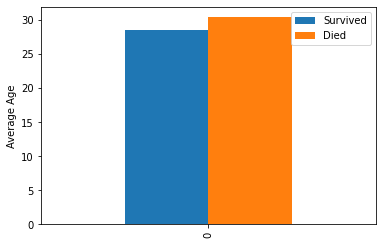

In [7]:
import matplotlib.pyplot as plt

newDF = pd.DataFrame(data={
    'Survived': [df['Age'][df['Survived'].isin([1])].mean()], 
    'Died': [df['Age'][df['Survived'].isin([0])].mean()]
})

newDF.plot(
    ylabel='Average Age',
    kind='bar',
)

-> More young people have survived, compared to the older ones. These numbers, however, are close.

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

<AxesSubplot:ylabel='Proportion of people that survived'>

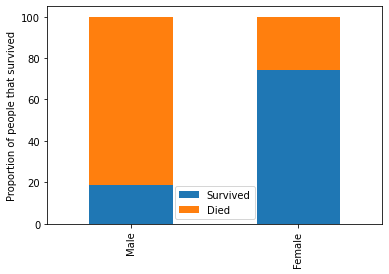

In [8]:
males, females = df['Sex'].isin([0]).sum(), df['Sex'].isin([1]).sum()
survived, died = df['Survived'].isin([1]), df['Survived'].isin([0])

newDF = pd.DataFrame({ 
    'Survived': [(df['Sex'][survived].isin([0]).sum() / males) * 100, (df['Sex'][survived].isin([1]).sum() / females) * 100],
    'Died': [(df['Sex'][died].isin([0]).sum() / males) * 100, (df['Sex'][died].isin([1]).sum() / females) * 100],
}, index=['Male', 'Female'])

newDF.plot(
    ylabel='Proportion of people that survived',
    kind='bar',
    stacked=True,
)


-> More females have survived, compared to the number of men. This is probably due to the priority of saving the women and children first

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

<AxesSubplot:title={'center':"Proportion of people's titles that survived"}>

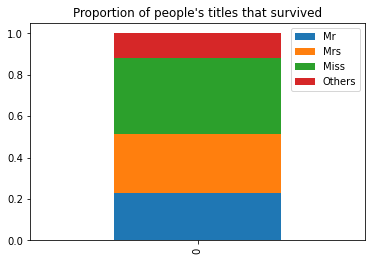

In [9]:
titleCount = df['Title'][df['Survived'] == 1].value_counts()
total = titleCount.sum()

pd.DataFrame({
    'Mr': [titleCount['Mr'] / total],
    'Mrs': [titleCount['Mrs'] / total],
    'Miss': [titleCount['Miss'] / total],
    'Others':
    [titleCount[~titleCount.index.isin(['Mr', 'Mrs', 'Miss'])].sum() / total],
}).plot(title='Proportion of people\'s titles that survived',
        kind='bar',
        stacked=True)


-> More unmarried women have survived, compared to the married women and men individually. But compared to married couples they are roughly the same

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

<AxesSubplot:ylabel='Average Fare'>

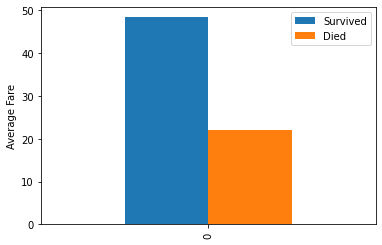

In [10]:
newDF = pd.DataFrame({
    'Survived': [df['Fare'][df['Survived'].isin([1])].mean()],
    'Died': [df['Fare'][df['Survived'].isin([0])].mean()],
})

newDF.plot(
    ylabel='Average Fare',
    kind='bar'
)

-> The people that survived were the ones that paid more for the ticket and thus better accomodation and chances of survival

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

<AxesSubplot:>

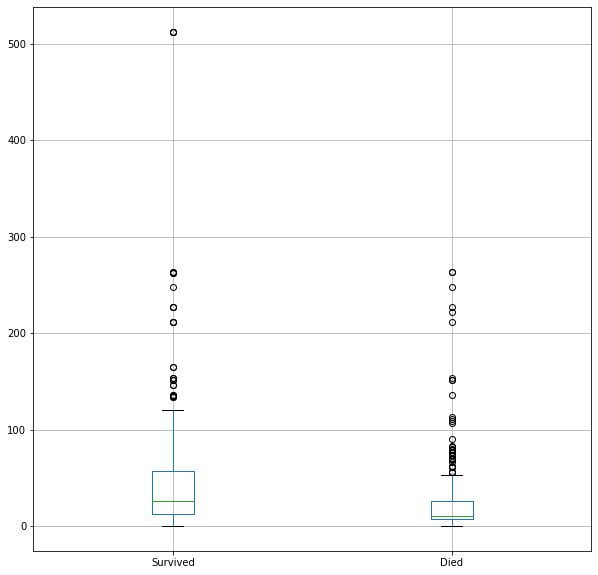

In [11]:
newDF = pd.DataFrame({
    'Survived': df['Fare'][df['Survived'].isin([1])],
    'Died': df['Fare'][df['Survived'].isin([0])],
})

newDF.boxplot(column=['Survived', 'Died'], figsize=(10, 10))


-> The average fare of the survivors is higher than the ones that did not make it. However, there is not a clear correlation between survivobility and price of a fare

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [12]:
def normalise(dataframe):
    mean, sdev = dataframe['Fare'].mean(), dataframe['Fare'].std()
    return dataframe['Fare'].subtract(mean, fill_value=0).divide(sdev, fill_value=0)


df['Fare'] = normalise(df)
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502163,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786404,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488580,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420494,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486064,S,William,Henry,Allen,Mr
5,6,0,3,"Moran, Mr. James",0,29.7,0,0,330877,-0.477848,Q,James,,Moran,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,0.395591,S,Timothy,J,McCarthy,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,-0.223957,S,Gosta,Leonard,Palsson,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,-0.424018,S,Oscar,W,Johnson,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,-0.042931,C,Nicholas,,Nasser,Mrs


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [13]:
names = df['Name']
df = df.drop(df.select_dtypes(exclude='number').columns, axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,-0.502163
1,2,1,1,1,38.0,1,0,0.786404
2,3,1,3,1,26.0,0,0,-0.488580
3,4,1,1,1,35.0,1,0,0.420494
4,5,0,3,0,35.0,0,0,-0.486064


m) Ignoring passenger ID, write a function that returns the names of the N most similar pairs of passengers using the euclidean distance? - (15 points)

In [14]:
import numpy as np

def N_most_similar(df, N):
    similarity_matrix = np.zeros((len(df), len(df)))

    for i, row1 in df.iterrows():
        for j, row2 in df.iterrows():
            if i == j:
                similarity_matrix[i][j] = np.inf
                continue
            similarity_matrix[i][j] = np.linalg.norm(row1.values - row2.values, 2)
    
    ordering = np.argsort(np.reshape(similarity_matrix, -1))
    ans = []
    seen = set()
    k, x = 0, 0

    while(k < N):
        i, j = ordering[x] // len(df), ordering[x] % len(df)
        mn, mx = min(i, j), max(i, j)

        if((mn, mx) not in seen):
            seen.add((mn, mx))
            ans.append((names[mn], names[mx]))
            k += 1
        x += 1
            

    return ans

print("The 3 most similar pairs of passengers are: " + str(N_most_similar(df, 3)))

The 3 most similar pairs of passengers are: [('Berriman, Mr. William John', 'Troupiansky, Mr. Moses Aaron'), ('Ivanoff, Mr. Kanio', 'Nankoff, Mr. Minko'), ('McGovern, Miss. Mary', 'Mockler, Miss. Helen Mary "Ellie"')]


## Exercise 2 - (40 points)

Another way to get data is by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below. - (5 points)

In [15]:
import requests
import json
import pandas as pd

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))

    return response

topics = ['Python', 'Data Science', 'Data Analysis', 'Machine Learning', 'Deep Learning']

python = get(topics[0])
data_science = get(topics[1])
data_analytics = get(topics[2])
machine_learning = get(topics[3])
deep_learning = get(topics[4])

b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. - (5 points)

In [16]:
python = pd.json_normalize(python['items'])
python.to_csv('python.csv')

data_science = pd.json_normalize(data_science['items'])
data_science.to_csv('data_science.csv')

data_analytics = pd.json_normalize(data_analytics['items'])
data_analytics.to_csv('data_analytics.csv')

machine_learning = pd.json_normalize(machine_learning['items'])
machine_learning.to_csv('machine_learning.csv')

deep_learning = pd.json_normalize(deep_learning['items'])
deep_learning.to_csv('deep_learning.csv')


c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. - (5 points)

In [17]:
python = python.rename(columns={
    'volumeInfo.title': 'Title',
    'volumeInfo.authors': 'Authors'
})

data_science = data_science.rename(columns={
    'volumeInfo.title': 'Title',
    'volumeInfo.authors': 'Authors'
})

data_analytics = data_analytics.rename(columns={
    'volumeInfo.title': 'Title',
    'volumeInfo.authors': 'Authors'
})

machine_learning = machine_learning.rename(columns={
    'volumeInfo.title': 'Title',
    'volumeInfo.authors': 'Authors'
})

deep_learning = deep_learning.rename(columns={
    'volumeInfo.title': 'Title',
    'volumeInfo.authors': 'Authors'
})

deep_learning.head()


,kind,id,etag,selfLink,Title,Authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,accessInfo.textToSpeechPermission,accessInfo.epub.isAvailable,accessInfo.epub.acsTokenLink,accessInfo.pdf.isAvailable,accessInfo.pdf.acsTokenLink,accessInfo.webReaderLink,accessInfo.accessViewStatus,accessInfo.quoteSharingAllowed,searchInfo.textSnippet,volumeInfo.subtitle
0,books#volume,omivDQAAQBAJ,xImv4K5lCT0,https://www.googleapis.com/books/v1/volumes/om...,Deep Learning,"[Ian Goodfellow, Yoshua Bengio, Aaron Courville]",MIT Press,2016-11-10,An introduction to a broad range of topics in ...,"[{'type': 'ISBN_13', 'identifier': '9780262337...",...,ALLOWED,True,http://books.google.com/books/download/Deep_Le...,True,http://books.google.com/books/download/Deep_Le...,http://play.google.com/books/reader?id=omivDQA...,SAMPLE,False,The hierarchy of concepts allows the computer ...,NaN
1,books#volume,Np9SDQAAQBAJ,EQameWrHCQM,https://www.googleapis.com/books/v1/volumes/Np...,Deep Learning,"[Ian Goodfellow, Yoshua Bengio, Aaron Courville]",MIT Press,2016-11-18,An introduction to a broad range of topics in ...,"[{'type': 'ISBN_13', 'identifier': '9780262035...",...,ALLOWED,False,NaN,False,NaN,http://play.google.com/books/reader?id=Np9SDQA...,SAMPLE,False,The hierarchy of concepts allows the computer ...,NaN
2,books#volume,1g0KywEACAAJ,tNooktmEoZw,https://www.googleapis.com/books/v1/volumes/1g...,Deep Learning,[Ian Goodfellow],NaN,2013,NaN,"[{'type': 'OTHER', 'identifier': 'OCLC:1120369...",...,ALLOWED,False,NaN,False,NaN,http://play.google.com/books/reader?id=1g0KywE...,NONE,False,NaN,NaN
3,books#volume,b06qDwAAQBAJ,1vNwSML7xcw,https://www.googleapis.com/books/v1/volumes/b0...,Deep Learning,[John D. Kelleher],MIT Press,2019-09-10,An accessible introduction to the artificial i...,"[{'type': 'ISBN_13', 'identifier': '9780262537...",...,ALLOWED,False,NaN,False,NaN,http://play.google.com/books/reader?id=b06qDwA...,SAMPLE,False,In this volume in the MIT Press Essential Know...,NaN
4,books#volume,9xZxDwAAQBAJ,IKzeVLRxd4c,https://www.googleapis.com/books/v1/volumes/9x...,The Deep Learning Revolution,[Terrence J. Sejnowski],MIT Press,2018-10-23,How deep learning—from Google Translate to dri...,"[{'type': 'ISBN_13', 'identifier': '9780262038...",...,ALLOWED,False,NaN,False,NaN,http://play.google.com/books/reader?id=9xZxDwA...,SAMPLE,False,Deep learning networks can play poker better t...,NaN


d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. - (10 points)

In [18]:
python['Topic'] = 'python'
data_science['Topic'] = 'data_science'
data_analytics['Topic'] = 'data_analytics'
machine_learning['Topic'] = 'machine_learning'
deep_learning['Topic'] = 'deep_learning'


newDF = pd.concat([python, data_science, data_analytics, machine_learning, deep_learning], ignore_index=True)
newDF.to_csv('new_train.csv')

e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). - (5 points)

In [19]:
def DataInTitle(df):
    return df.loc[df['Title'].str.contains('Data', case=False)]

DataInTitle(newDF).shape

(20, 52)

f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E` - (10 points)

In [20]:
def AuthorsStartingWithChar(df, char = 'E'):
    temp = []
    for row in df['Authors']:
        found = False
        for author in row:
            name = author.split(' ')

            if name[0][0] == char or name[-1][0] == char:
                found = True
                break
        
        temp.append(found)

    return df[pd.Series(temp)]

AuthorsStartingWithChar(newDF).shape

(3, 52)